## Importing libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading Dataset

In [20]:
df=pd.read_csv('Mall_Customers.csv')

## EDA

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.shape

(200, 5)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
df=df.drop(columns=['CustomerID','Gender','Age'])

In [26]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

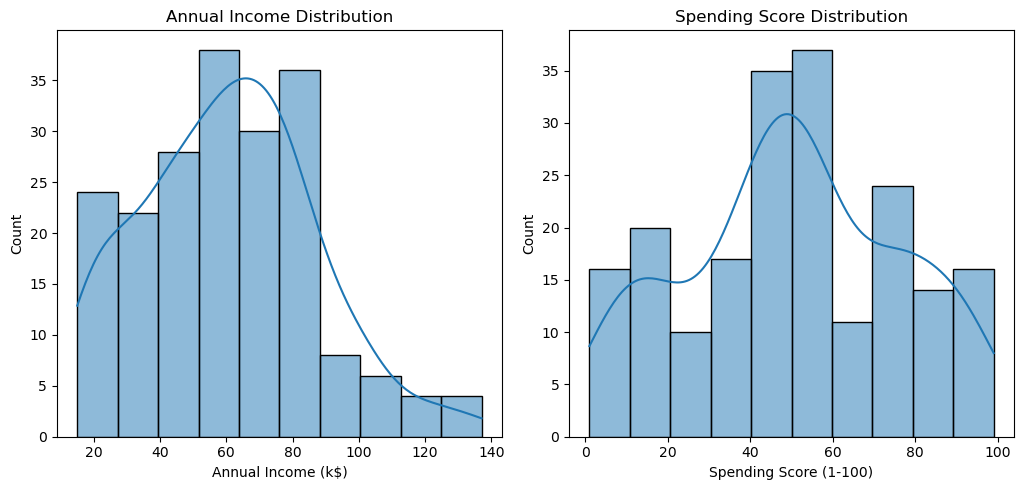

In [27]:
plt.figure(figsize=(15, 5))

# Distribution plot for Annual Income
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=10)
plt.title('Annual Income Distribution')

# Distribution plot for Spending Score
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=10)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

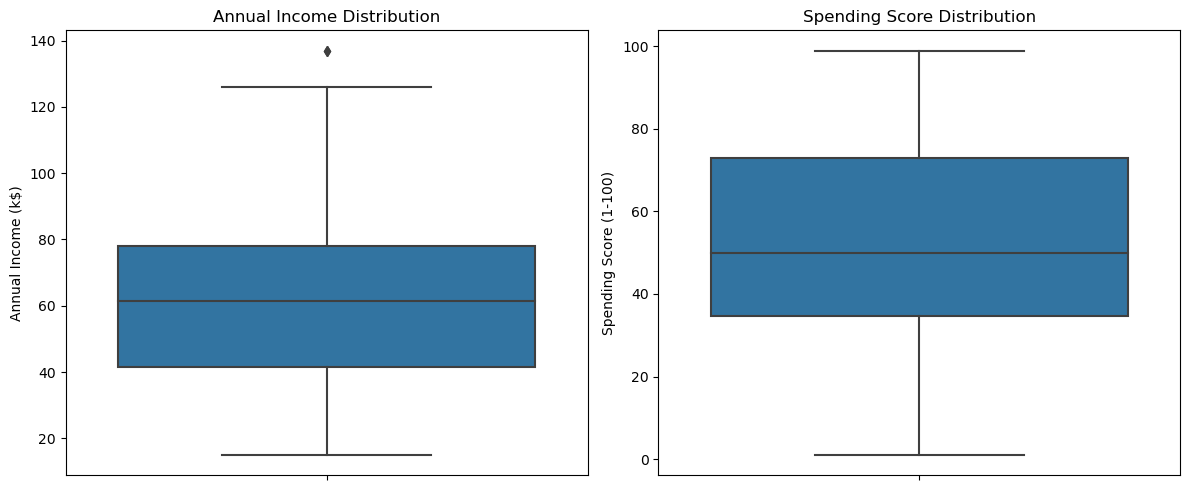

In [28]:
plt.figure(figsize=(12, 5))

# Box plot for Annual Income
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Annual Income Distribution')

# Box plot for Spending Score
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

## Find appropriate number of clusters

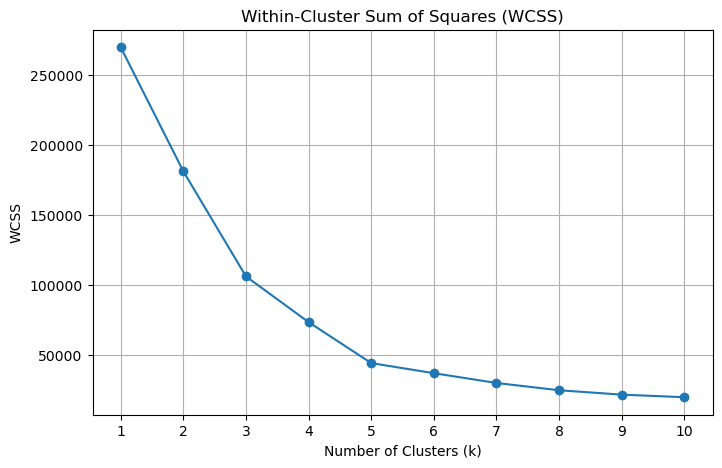

In [29]:
# Calculate WCSS for k values from 1 to 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Within-Cluster Sum of Squares (WCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


## Creating and Training the Pipeline for K-means clustering

In [30]:
# Define the pipeline for k-means clustering
kmeans_pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42))
])

# Apply k-means clustering
kmeans_pipeline.fit(df)

Pipeline(steps=[('kmeans', KMeans(n_clusters=5, n_init=10, random_state=42))])

In [31]:
# Extract the clusters from the k-means results
clusters = kmeans_pipeline.named_steps['kmeans'].labels_

df['Cluster'] = clusters
print(df.head())

   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4


In [32]:
# Average Annual Income and Spending Score for each cluster
print(df.groupby('Cluster')[[ 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


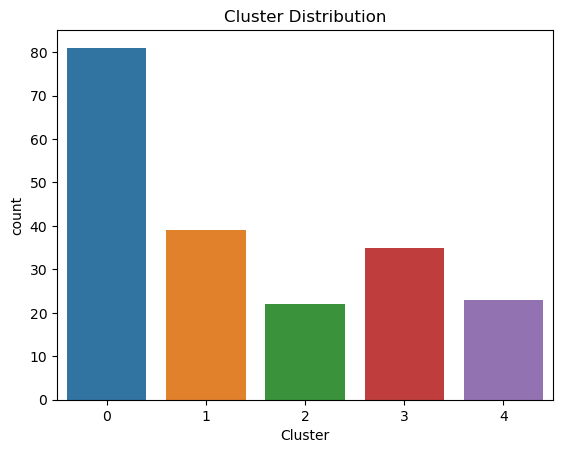

In [33]:
# Distribution of clusters
sns.countplot(x='Cluster',data=df)
plt.title('Cluster Distribution')
plt.show()

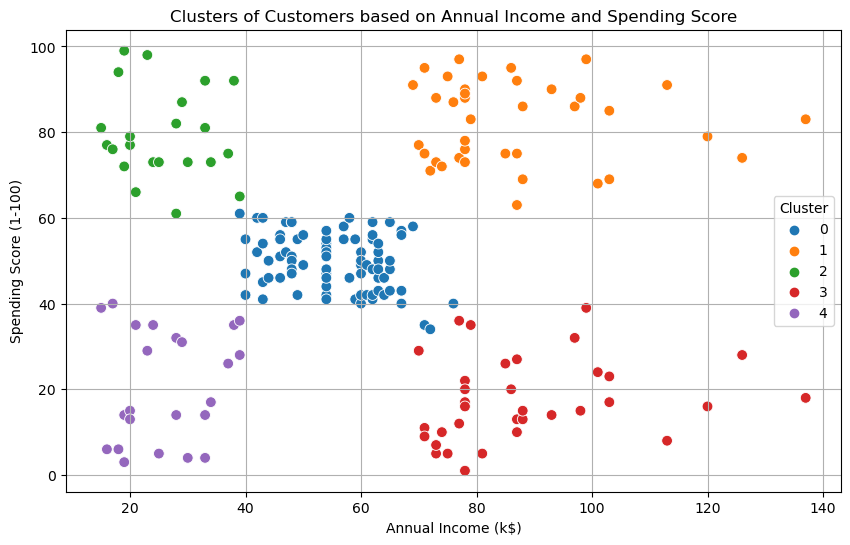

In [34]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='tab10', s=60)
plt.title('Clusters of Customers based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

## Deploy the model using pickle

In [35]:
pickle.dump(kmeans_pipeline, open('pipe.pkl','wb'))
pickle.dump(df, open('df.pkl','wb'))

## Conclusion
In conclusion, the analysis of mall customer data has revealed distinct shopping personas through customer segmentation into five clusters. Each cluster represents a unique combination of income and spending behavior:

- Cluster 0: Mid Income, Mid Spending
- Cluster 1: High Income, Low Spending
- Cluster 2: Low Income, Low Spending
- Cluster 3: Low Income, High Spending
- Cluster 4: High Income, High Spending

These clusters provide valuable insights into the diverse spending habits and financial profiles of mall customers. By understanding these personas, businesses can tailor their marketing strategies, product offerings, and customer experiences to better cater to the needs and preferences of each segment. This targeted approach can lead to improved customer satisfaction, increased sales, and enhanced business growth.